# Add public Vector Dataset

In [1]:
from datetime import datetime

import geoengine_openapi_client

import geoengine as ge

Initialize Geo Engine as Admin

In [2]:
ge.initialize("http://localhost:3030/api", ("admin@localhost", "adminadmin"))

List volumes

In [3]:
volumes = ge.volumes()
volumes

[Volume(name='test_data', path='test_data/')]

Select volume

In [4]:
volume = ge.volume_by_name("test_data")
volume

Volume(name='test_data', path='test_data/')

 Define metadata

In [5]:
file_path = "vector/data/germany_polygon.gpkg"  # specify file path relative to volume path

layer_name = "test_germany"  # specify layer name

ogr_params = geoengine_openapi_client.OgrSourceDataset(
    file_name=file_path,
    layer_name=layer_name,
    data_type=ge.VectorDataType.MULTI_POLYGON.to_api_enum(),
    time=ge.OgrSourceDatasetTimeType.none().to_api_dict(),
    columns=geoengine_openapi_client.OgrSourceColumnSpec(
        y="",
        x="",
        float=[],
        int=[],
        text=[],
    ),
    on_error=ge.OgrOnError.ABORT.to_api_enum(),
)

result_descriptor = ge.VectorResultDescriptor(
    spatial_reference="EPSG:4326",
    data_type=ge.VectorDataType.MULTI_POLYGON,
    columns={},
    spatial_bounds=ge.BoundingBox2D(5.852490, 47.271121, 15.022059, 55.065334),
    time_bounds=None,
)

meta_data = geoengine_openapi_client.MetaDataDefinition(
    geoengine_openapi_client.OgrMetaData(
        type="OgrMetaData",
        loadingInfo=ogr_params,
        resultDescriptor=result_descriptor.to_api_dict().to_dict(),
    )
)

meta_data

MetaDataDefinition(oneof_schema_1_validator=None, oneof_schema_2_validator=None, oneof_schema_3_validator=None, oneof_schema_4_validator=None, oneof_schema_5_validator=None, oneof_schema_6_validator=None, actual_instance=OgrMetaData(loading_info=OgrSourceDataset(attribute_query=None, cache_ttl=None, columns=OgrSourceColumnSpec(bool=None, datetime=None, var_float=[], format_specifics=None, int=[], rename=None, text=[], x='', y=''), data_type=<VectorDataType.MULTIPOLYGON: 'MultiPolygon'>, default_geometry=None, file_name='vector/data/germany_polygon.gpkg', force_ogr_spatial_filter=None, force_ogr_time_filter=None, layer_name='test_germany', on_error=<OgrSourceErrorSpec.ABORT: 'abort'>, sql_query=None, time=OgrSourceDatasetTimeType(oneof_schema_1_validator=None, oneof_schema_2_validator=None, oneof_schema_3_validator=None, oneof_schema_4_validator=None, actual_instance=OgrSourceDatasetTimeTypeNone(type='none'), one_of_schemas={'OgrSourceDatasetTimeTypeStartEnd', 'OgrSourceDatasetTimeTypeS

In [6]:
add_dataset_properties = ge.AddDatasetProperties(
    name="germany_polygon",
    display_name="Germany Polygon",
    source_operator="OgrSource",
    description="Germany polygon for testing purposes",
    symbology=None,
    provenance=[
        ge.Provenance(
            citation="Geo Engine et.al (2023)",
            uri="TODO",
            license="TODO",
        )
    ],
)

add_dataset_properties.to_api_dict()

AddDataset(description='Germany polygon for testing purposes', display_name='Germany Polygon', name='germany_polygon', provenance=[Provenance(citation='Geo Engine et.al (2023)', license='TODO', uri='TODO')], source_operator='OgrSource', symbology=None, tags=None)

Add dataset to the matching volume

In [7]:
dataset_name = ge.add_dataset(volume, add_dataset_properties, meta_data)

dataset_name

germany_polygon

Verify that data is accessible for user

In [8]:
ge.reset()
ge.initialize("http://localhost:3030/api")


def create_ogr_source_workflow(dataset_id):
    return {
        "type": "Vector",
        "operator": {
            "type": "OgrSource",
            "params": {
                "data": "germany_polygon",
            },
        },
    }


workflow = ge.register_workflow(create_ogr_source_workflow(dataset_name))

workflow.get_result_descriptor()

Data type:         MultiPolygon
Spatial Reference: EPSG:4326
Columns:

Load the data

<Axes: >

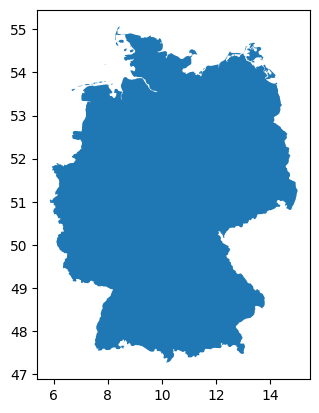

In [9]:
time = datetime.strptime("2014-04-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")

data = workflow.get_dataframe(
    ge.QueryRectangle(
        ge.BoundingBox2D(5.852490, 47.271121, 15.022059, 55.065334), ge.TimeInterval(time, time), srs="EPSG:4326"
    )
)

data.plot()

Delete the dataset

In [10]:
ge.reset()
ge.initialize("http://localhost:3030/api", ("admin@localhost", "adminadmin"))

ge.delete_dataset(dataset_name)

Verify the dataset was deleted

In [11]:
try:
    data = workflow.get_dataframe(
        ge.QueryRectangle(
            ge.BoundingBox2D(5.852490, 47.271121, 15.022059, 55.065334), ge.TimeInterval(time, time), srs="EPSG:4326"
        )
    )
except Exception as e:
    print(e)

UnknownDatasetName: Dataset name 'germany_polygon' does not exist
